In [1]:

# # Assessment 3 - Online Shoppers Purchasing Intention
# #### Objective: 

In [2]:


# data manipulation
import pandas as pd
import numpy as np

In [3]:


# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:


# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                             roc_curve, accuracy_score, precision_score, recall_score, 
                             f1_score, matthews_corrcoef, silhouette_score, davies_bouldin_score)

In [5]:


# dimensionality reduction
from sklearn.decomposition import PCA

In [6]:


# clustering
from sklearn.cluster import KMeans, DBSCAN

In [7]:


# data preprocessing
from sklearn.preprocessing import MinMaxScaler

In [8]:


# handling imbalanced data
from imblearn.over_sampling import SMOTE

In [9]:


# displaying outputs in jupyter
from IPython.display import display

from sklearn.mixture import GaussianMixture

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from joblib import Parallel, delayed

In [10]:


def plotbox_and_hist(df, columns, figsize=(30, 80)):
    fig, axes = plt.subplots(len(columns), 2, figsize=figsize)

    for i, column in enumerate(columns):
        sns.boxplot(x=df[column], ax=axes[i, 0])
        sns.histplot(x=df[column], ax=axes[i, 1])

    plt.tight_layout()
    plt.show()

In [11]:


import matplotlib.pyplot as plt
import seaborn as sns

In [12]:


def countplot_value(df, columns, figsize=(20, 30)):
    # Compute the number of rows and columns for subplots
    num_columns = 2
    num_rows = (len(columns) + 1) // num_columns  # Ensures proper grid size for odd numbers
    
    fig, axes = plt.subplots(num_rows, num_columns, figsize=figsize)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, column in enumerate(columns):
        ax = axes[i]
        sns.countplot(x=df[column], ax=ax)
        
        # Annotate bar heights
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        xytext=(0, 5), textcoords='offset points')
        ax.set_title(f'{column} Counts')

    # Remove any unused subplot axes
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


# ## 1. Retrieving and Preparing the Data

# ### 1.1. Data Loading

In [13]:


# load the dataset
file_path = 'online_shoppers_intention.csv'
df = pd.read_csv(file_path)


# ### 1.2. Dataset Observation

In [14]:


# display the first 5 rows of the dataset
display(df.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [15]:


# summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [16]:


df.describe()

# create a copy of the dataframe to store the cleaned data
df_clean = df.copy()

In [17]:


# display the unique values of the 'Month' and 'VisitorType' columns
print(df_clean['Month'].unique())
print(df_clean['VisitorType'].unique())

['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
['Returning_Visitor' 'New_Visitor' 'Other']


In [18]:


# fix typos in the 'Month' column
df_clean['Month'] = df_clean['Month'].replace({'June': 'Jun'})
# convert the 'Month' column to numerical values
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df_clean['Month'] = df_clean['Month'].map(month_map)
df_clean = df_clean.sort_values('Month')
# verify the changes
print(df_clean['Month'].unique())

[ 2  3  5  6  7  8  9 10 11 12]


In [19]:


# convert the 'Month' and 'Revenue' columns to numerical
bool_columns = ['Weekend', 'Revenue']
df_clean[bool_columns] = df_clean[bool_columns].astype(int)

In [20]:


# verify the conversion
df_clean.info()


# #### 1.3.1. Univariate Analysis of Numerical values

<class 'pandas.core.frame.DataFrame'>
Index: 12330 entries, 0 to 12303
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType              12

In [21]:


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_clean['VisitorType'] = encoder.fit_transform(df_clean['VisitorType'])
print(df_clean['VisitorType'])

0        2
1        2
2        2
3        2
4        2
        ..
12319    2
12318    2
12317    0
12304    2
12303    2
Name: VisitorType, Length: 12330, dtype: int64


In [22]:


columns = ["Administrative", "Administrative_Duration", "Informational", "Informational_Duration",
           "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues",
           "SpecialDay"]

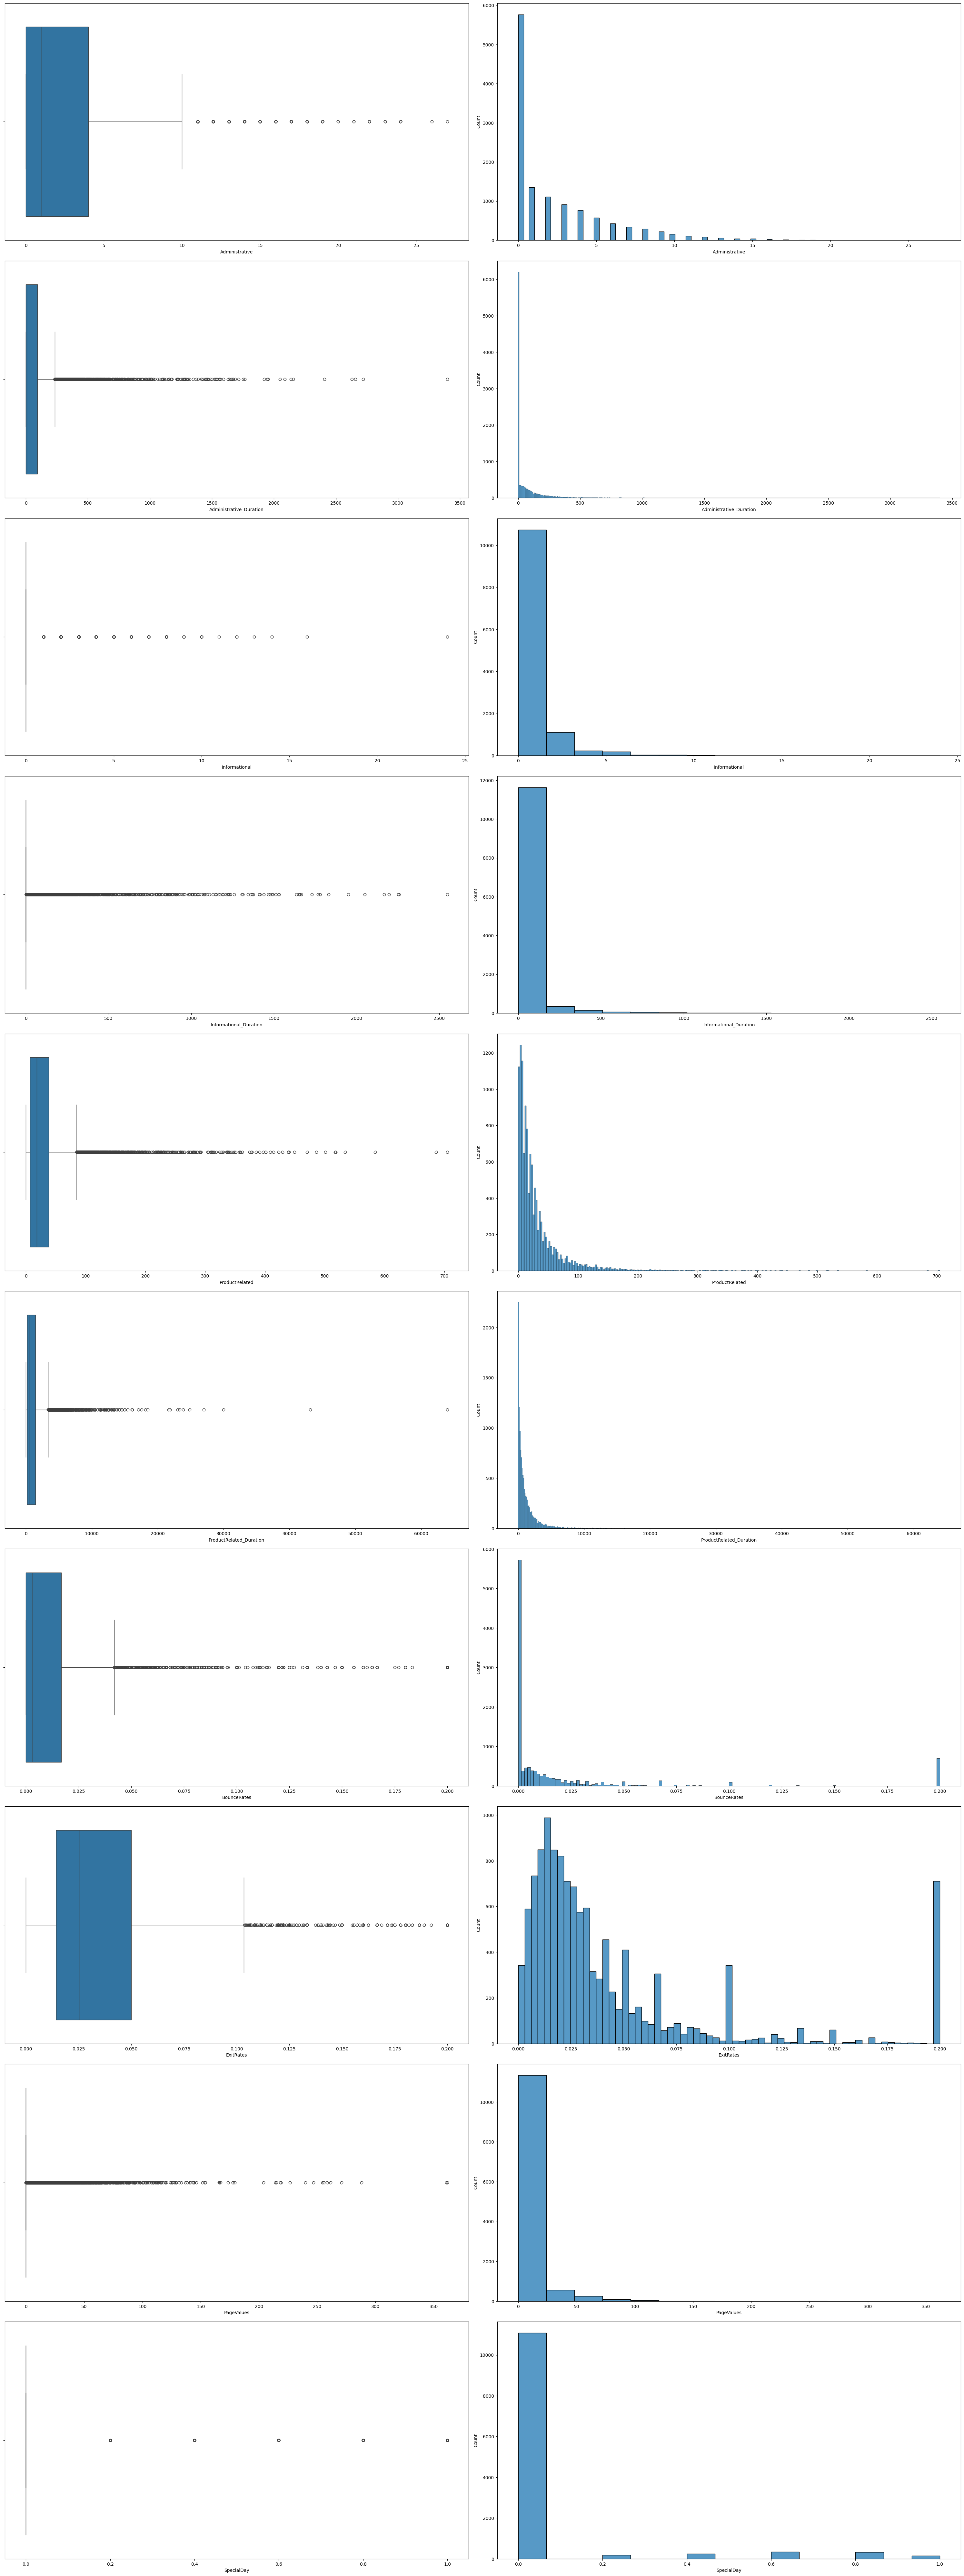

In [23]:


plotbox_and_hist(df_clean, columns)


# ##### Analysis
# - Histograms: Most features are right-skewed, with values concentrated on the lower end and long tails extending to higher values. Features like **Administrative** and **Administrative_Duration** show that most sessions involve minimal administrative activities, with outliers at higher values. **Informational** and **Informational_Duration** follow a similar pattern, suggesting that informational activities are not common in most sessions. **ProductRelated** and **ProductRelated_Duration** have a broader spread compared to administrative and informational features. This indicates more varied user engagement with product-related pages, although there are still some significant outliers. **BounceRates** and **ExitRates** are mostly near zero, showing that users usually stay on the site instead of leaving immediately. **PageValues** is skewed with most values being zero, while a few sessions have high values, showing only a small number of sessions generate significant revenue. **SpecialDay** has specific peaks that correspond to certain predefined special days in the data.
# 
# - Boxplots: Many features have visible outliers, represented by points beyond the whiskers of the boxplot. **Administrative_Duration** and **Informational_Duration** show tight interquartile ranges (IQRs) with outliers at higher values, confirming that most sessions have minimal durations for these activities. **ProductRelated_Duration** has a wider IQR, reflecting more variability in user interactions with product pages, but also includes a few extreme outliers. **BounceRates** and **ExitRates** have very narrow IQRs, with most values near zero, but occasional outliers suggest some sessions have high rates. **PageValues** has a compact IQR but includes extreme outliers, reflecting rare but impactful sessions with high page values. **SpecialDay** does not show significant outliers since its values are predefined and specific.
# 
# Further analysis will help us decide whether to clean datapoints, apply data imputation, or drop the problematic columns.

# #### 1.3.2. Univariate Analysis of Categorical values

In [24]:


columns = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Revenue"]

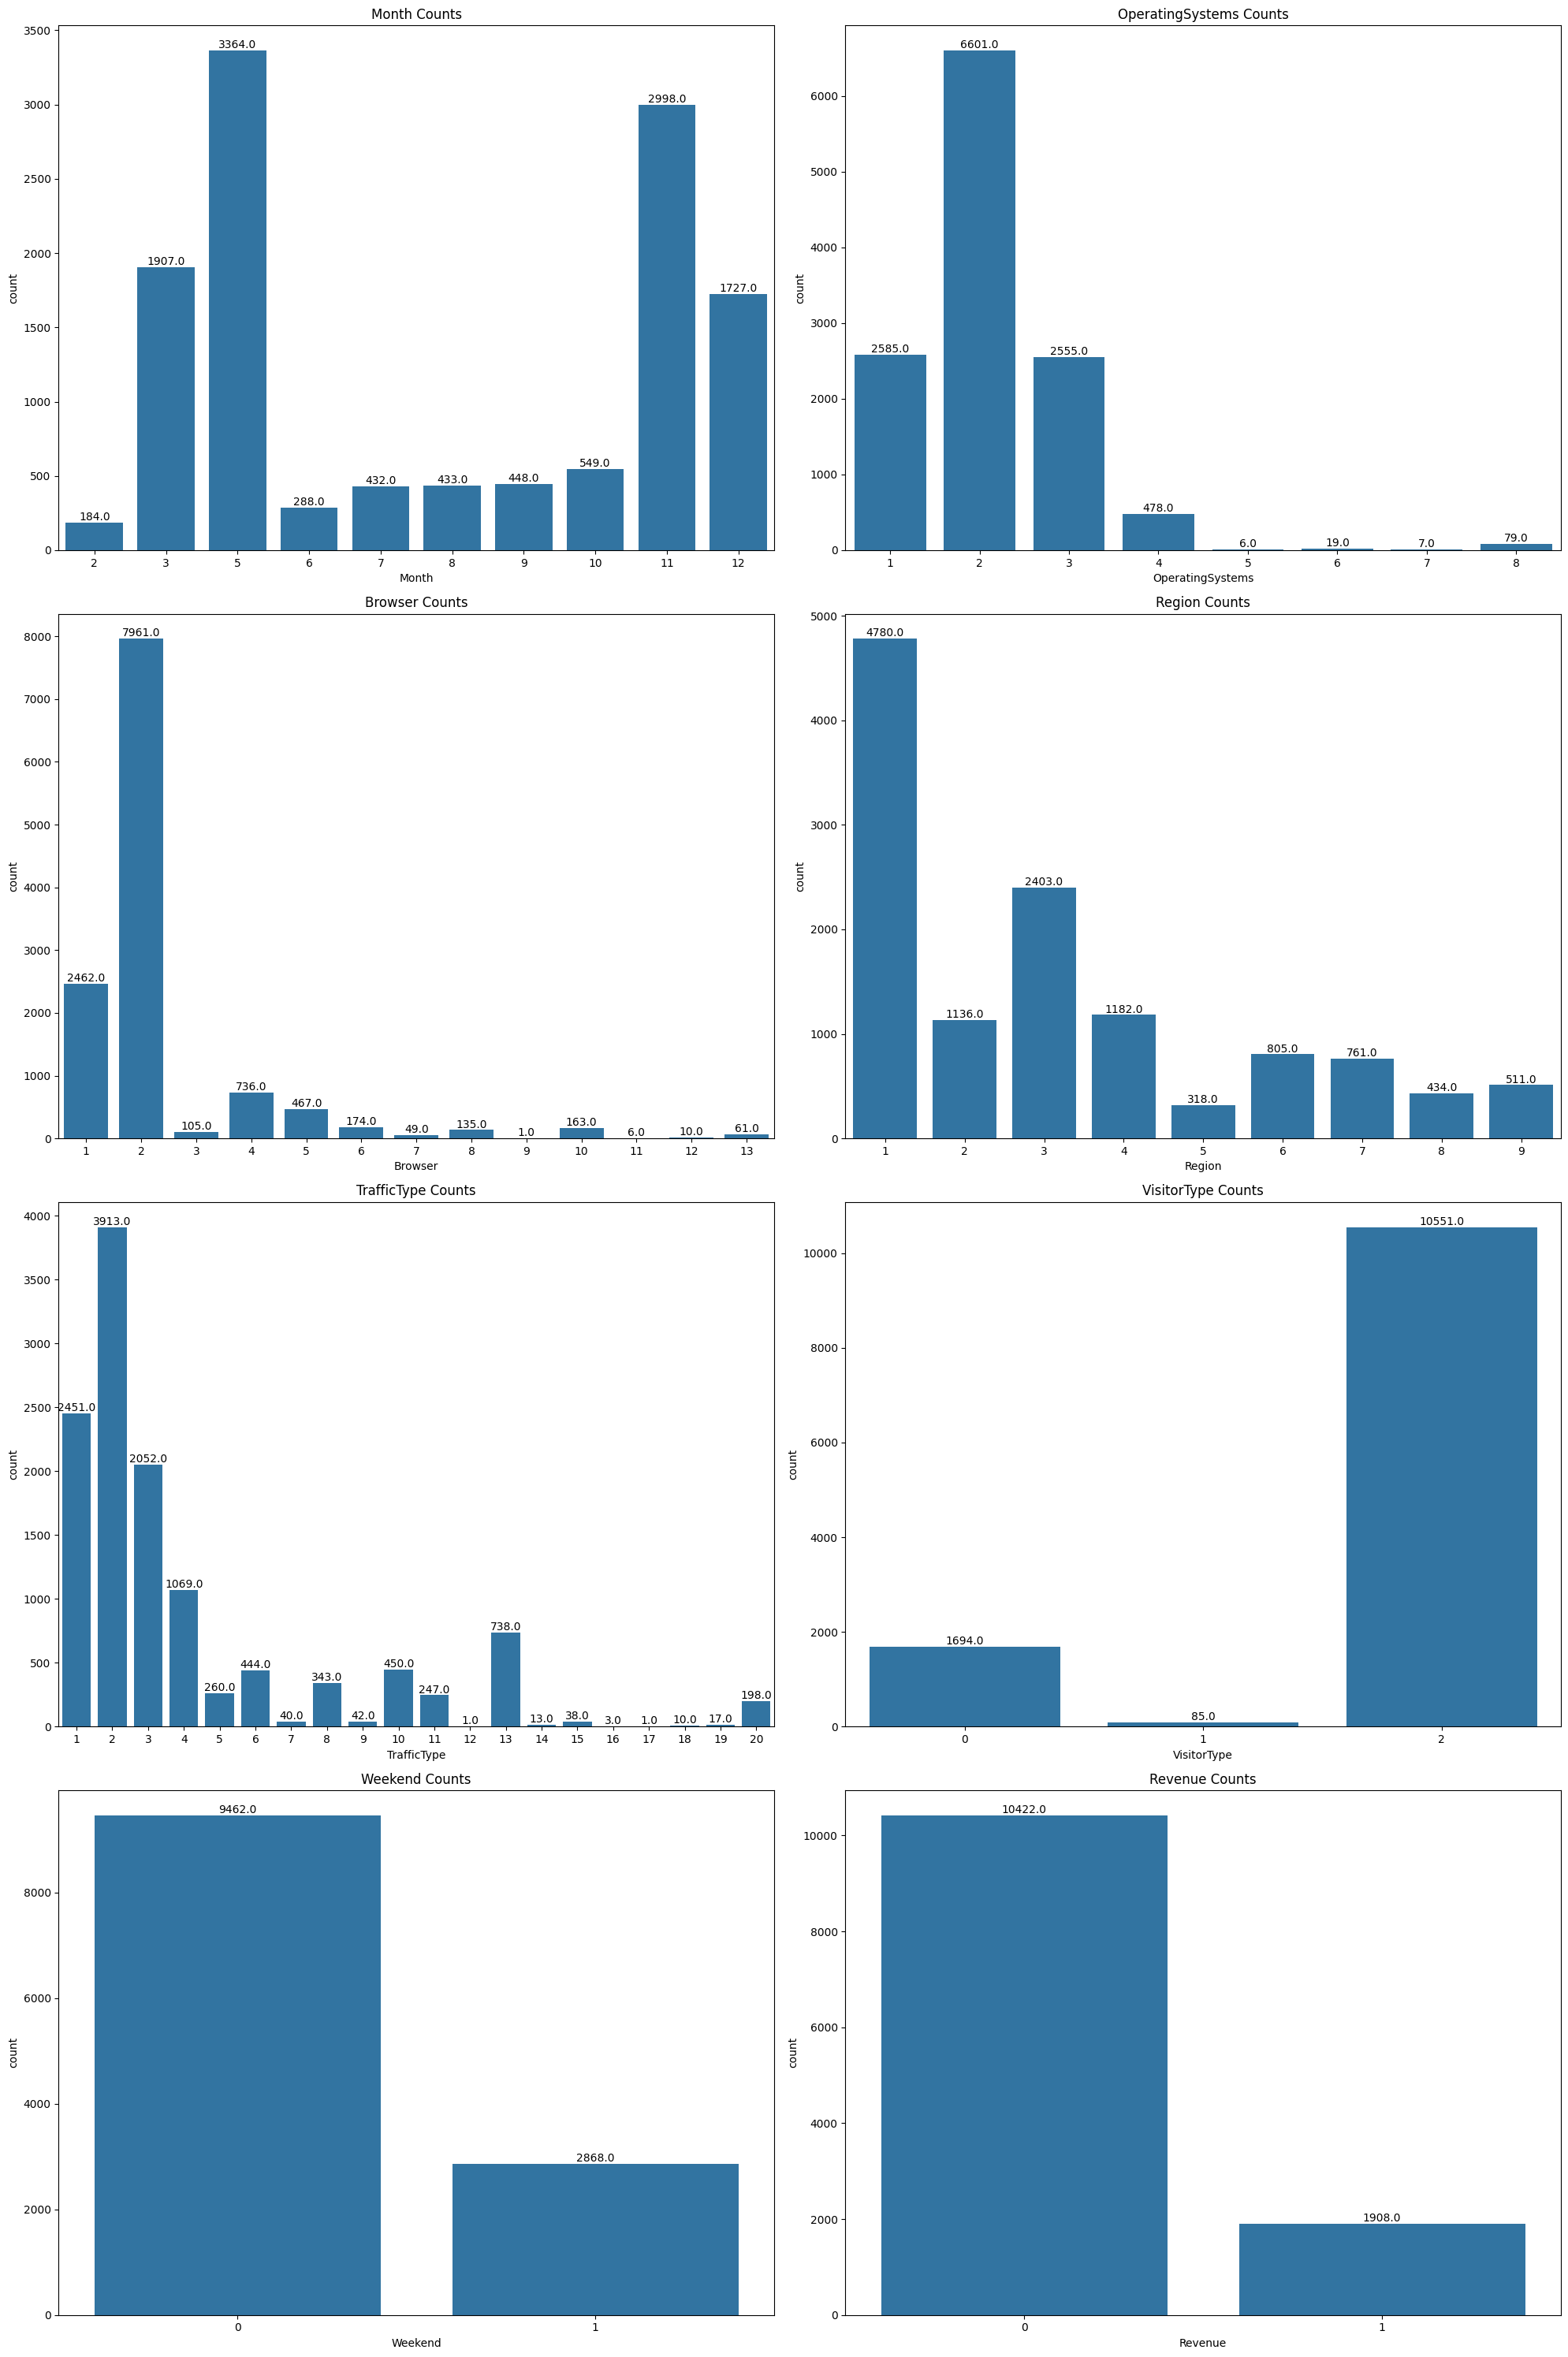

KeyboardInterrupt: 

In [ ]:


countplot_value(df_clean, columns)

sns.pairplot(df_clean, hue="Revenue")

# remove outliers with low frequencies
df_temp = df_clean.copy()
df_clean = df_clean[((df_clean['Administrative'] < 25) & 
                     (df_clean['Administrative_Duration'] < 2000) & 
                     (df_clean['Informational'] < 15) & 
                     (df_clean['Informational_Duration'] < 1750) & 
                     (df_clean['ProductRelated'] < 475) & 
                     (df_clean['ProductRelated_Duration'] < 30000) & 
                     (df_clean['BounceRates'] < 0.175) & 
                     (df_clean['ExitRates'] < 0.19) &
                     (df_clean['PageValues'] < 250))]

In [ ]:


# verify removal
rows_remove = len(df_temp) - len(df_clean)
print(f"The numbers of rows removed: {rows_remove}")

# since we do not have enough context to extract meaning from the values of categorical variables such as 'OperatingSystems', 'Browser', 'Region', and 'TrafficType', 
# we will drop these columns.
df_features = df.copy()
df_features = df_clean.drop(columns=["OperatingSystems", "Browser", "Region", "TrafficType"])

In [ ]:


# apply one-hot encoding to 'VisitorType' and 'Month' and concatenate with the original DataFrame
df_features = pd.concat([df_features, pd.get_dummies(df_features["Month"], prefix='Month_')], axis=1)
df_features = pd.concat([df_features, pd.get_dummies(df_features["VisitorType"], prefix='VisitorType_')], axis=1)

# drop the original 'VisitorType' column
df_features.drop("Month", axis=1, inplace=True)
df_features.drop("VisitorType", axis=1, inplace=True)

In [ ]:


# correlation analysis
target_df = df_features['Revenue']

In [ ]:


all_corr = df_features.corr(method = 'pearson')

In [ ]:


mask = np.zeros_like(all_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

In [ ]:


ax = plt.figure(figsize=(15, 10))
ax = sns.heatmap(all_corr, cmap='Blues', annot=True, fmt='.2f', mask = mask)
ax = plt.xticks(rotation=85)
ax = plt.title("Correlations between features")

df_cluster = df_clean.copy()

# define model parameters
model_target = 'Revenue'
model_features = ['Administrative', 'Administrative_Duration', 'Informational', 
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# prepare the data
df_cluster = df_cluster[model_features]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(df_cluster[model_features])
df_cluster[model_features] = scaled_features

# determine optimal number of pca components using explained variance ratio
pca_full = PCA()
pca_full.fit(df_cluster[model_features])
explained_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1  # keep 95% of variance

# apply pca with optimal components
pca = PCA(n_components=n_components)
pca_features = pca.fit_transform(df_cluster[model_features])

def fit_gmm(n_components, covariance_type, init_params, max_iter, pca_features):
    gmm = GaussianMixture(
        n_components=n_components,
        covariance_type=covariance_type,
        init_params=init_params,
        max_iter=max_iter,
        random_state=42
    )
    gmm.fit(pca_features)
    bic = gmm.bic(pca_features)
    return bic, gmm

best_bic = float('inf')
best_gmm_bic = None
best_n_components = None
best_covariance_type = None
best_init_params = None
best_max_iter = None

# define the grid of hyperparameters to search
param_grid = [(n_components, covariance_type, init_params, max_iter) 
              for n_components in range(2, 21)
              for covariance_type in ['full', 'tied', 'diag', 'spherical']
              for init_params in ['kmeans', 'random']
              for max_iter in [100, 200, 300]]

# use parallel processing for hyperparameter search
results = Parallel(n_jobs=-1)(
    delayed(fit_gmm)(n_components, covariance_type, init_params, max_iter, pca_features)
    for (n_components, covariance_type, init_params, max_iter) in param_grid
)

# extract best gmm based on bic
for bic, gmm in results:
    if bic < best_bic:
        best_bic = bic
        best_gmm_bic = gmm

# predict with the best gmm model
gmm_clusters = best_gmm_bic.predict(pca_features)

# visualize the clusters
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=gmm_clusters, cmap='viridis')  # Use gmm_clusters
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Visualization with Best GMM Model')
plt.show()

# print the best model parameters
print(f'Best BIC: {best_bic}')
print(f'Best number of components: {best_n_components}')
print(f'Best covariance type: {best_covariance_type}')
print(f'Best init params: {best_init_params}')
print(f'Best max iterations: {best_max_iter}')

# add cluster labels to the DataFrame
df_cluster['Cluster'] = gmm_clusters

# analyze cluster characteristics
cluster_summary = df_cluster.groupby('Cluster')[model_features].mean()
print(cluster_summary)

# add the target variable back to the DataFrame for analysis
df_cluster[model_target] = df_clean[model_target]

# link clusters to hypothesis by checking purchase rates
purchase_rate = df_cluster.groupby('Cluster')[model_target].mean()
print(purchase_rate)

from joblib import Parallel, delayed
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

def fit_dbscan(eps, min_samples, pca_features):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(pca_features)

    # Skip if all points are noise
    if len(np.unique(clusters)) <= 1:
        return -1, None  # Return -1 for invalid score

    try:
        score = silhouette_score(pca_features, clusters)
        return score, dbscan
    except:
        return -1, None  # Return -1 in case of error

best_silhouette = -1
best_eps = None
best_min_samples = None
best_dbscan = None

# Define parameter ranges
eps_range = np.arange(0.1, 1.1, 0.1)
min_samples_range = range(5, 21, 5)

# Create the parameter grid
param_grid = [(eps, min_samples) for eps in eps_range for min_samples in min_samples_range]

# Use parallel processing for the grid search
results = Parallel(n_jobs=-1)(
    delayed(fit_dbscan)(eps, min_samples, pca_features) for eps, min_samples in param_grid
)

# Process results to find the best model based on silhouette score
for score, dbscan in results:
    if score > best_silhouette:
        best_silhouette = score
        best_dbscan = dbscan
        best_eps = dbscan.eps
        best_min_samples = dbscan.min_samples

# Train final model with best parameters
final_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_clusters = final_dbscan.fit_predict(pca_features)

# visualize results
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering Results')
plt.colorbar(label='Cluster')
plt.show()

# print best parameters for DBSCAN model
print(f'Best eps: {best_eps}')
print(f'Best min_samples: {best_min_samples}')
print(f'Best silhouette score: {best_silhouette}')
print(f'Number of clusters found: {len(np.unique(dbscan_clusters[dbscan_clusters != -1]))}')  # Use dbscan_clusters
print(f'Number of noise points: {len(dbscan_clusters[dbscan_clusters == -1])}')  # Use dbscan_clusters

# add cluster labels to the dataframe
df_cluster['Cluster'] = dbscan_clusters

# analyze cluster characteristics
cluster_summary = df_cluster.groupby('Cluster')[model_features].mean()
print(cluster_summary)

# add the target variable back to the dataframe for analysis
df_cluster[model_target] = df_clean[model_target]

# link clusters to hypothesis by checking purchase rates
purchase_rate = df_cluster.groupby('Cluster')[model_target].mean()
print(purchase_rate)

# remove noise from DBSCAN results for evaluation
filtered_dbscan_clusters = dbscan_clusters[dbscan_clusters != -1]
filtered_dbscan_features = pca_features[dbscan_clusters != -1]

# DBSCAN Metrics
if len(np.unique(filtered_dbscan_clusters)) > 1:
    dbscan_silhouette = silhouette_score(filtered_dbscan_features, filtered_dbscan_clusters)
    dbscan_dbi = davies_bouldin_score(filtered_dbscan_features, filtered_dbscan_clusters)
else:
    dbscan_silhouette = None
    dbscan_dbi = None
dbscan_noise_percentage = np.sum(dbscan_clusters == -1) / len(dbscan_clusters)

# GMM Metrics
if len(np.unique(gmm_clusters)) > 1:
    gmm_silhouette = silhouette_score(pca_features, gmm_clusters)
    gmm_dbi = davies_bouldin_score(pca_features, gmm_clusters)
else:
    gmm_silhouette = None
    gmm_dbi = None

# add target variable to compare purity
df_cluster[model_target] = df_clean[model_target]

# purity function
def purity_score(true_labels, predicted_clusters):
    contingency_matrix = pd.crosstab(predicted_clusters, true_labels)
    return np.sum(np.amax(contingency_matrix.values, axis=1)) / len(true_labels)

# purity for DBSCAN (excluding noise)
dbscan_purity = purity_score(df_cluster[model_target][dbscan_clusters != -1], filtered_dbscan_clusters)

# purity for GMM
gmm_purity = purity_score(df_cluster[model_target], gmm_clusters)

# output results
print("DBSCAN Metrics:")
if dbscan_silhouette is not None:
    print(f" - Silhouette Score: {dbscan_silhouette}")
    print(f" - Davies-Bouldin Index: {dbscan_dbi}")
else:
    print(" - Silhouette Score: Not applicable (only one cluster)")
    print(" - Davies-Bouldin Index: Not applicable (only one cluster)")
print(f" - Noise Percentage: {dbscan_noise_percentage:.2%}")
print(f" - Purity Score: {dbscan_purity}")

print("\nGMM Metrics:")
if gmm_silhouette is not None:
    print(f" - Silhouette Score: {gmm_silhouette}")
    print(f" - Davies-Bouldin Index: {gmm_dbi}")
else:
    print(" - Silhouette Score: Not applicable (only one cluster)")
    print(" - Davies-Bouldin Index: Not applicable (only one cluster)")
print(f" - Purity Score: {gmm_purity}")

In [ ]:


X = df_clean.drop(columns=['Revenue'])
Y = df_clean['Revenue'].astype(int)


# ### Check the data imbalancing

In [ ]:


value_counts = Y.value_counts()
print(value_counts)


# ### Oversample the imbalance data
# 

In [ ]:


from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ros = RandomOverSampler()
X_KNN, Y_KNN = ros.fit_resample(X, Y) # take more from the less class to increase its size

In [ ]:


value_counts = Y_KNN.value_counts()
print(value_counts)


# ## Spliting the data

In [ ]:


from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [ ]:


# Assuming X_KNN and Y_KNN are already defined
x_train_origin, x_test_origin, y_train_origin, y_test_origin = train_test_split(X_KNN, Y_KNN, test_size=0.3, random_state=0)

In [ ]:


# Permutation Importance for KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_origin, y_train_origin)

In [ ]:


# Compute permutation importance
perm_importance = permutation_importance(knn, x_test_origin, y_test_origin, n_repeats=10, random_state=42)

In [ ]:


# Get feature importance scores
perm_importance_df = pd.DataFrame({
    'Feature': X_KNN.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

In [ ]:


# Save or print the results
print(perm_importance_df)  # To print the importance scores
perm_importance_df.to_csv('permutation_importance.csv', index=False)  # Save as CSV file


# # Select features to feed

In [ ]:


selected_features = [
    "PageValues",
    "ProductRelated_Duration",
    "Administrative_Duration",
    "Informational_Duration",
    "ProductRelated"
]

In [ ]:


# Creating a new dataset with the selected features
X_KNN_selected = X_KNN[selected_features]

In [ ]:


# Assuming X_KNN and Y_KNN are already defined
X = df_clean[selected_features]   
y = df_clean['Revenue'].astype(int)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:


print(y_train.value_counts(), y_test.value_counts())

In [ ]:


# Apply RandomOverSampler to balance the classes
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:


print(y_train.value_counts(), y_test.value_counts())

In [ ]:


# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:


param_dist = {
    'n_neighbors': randint(3, 15),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [ ]:


# Initialize the KNN classifier
knn = KNeighborsClassifier()

In [ ]:


# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

In [ ]:


# Get the best parameters and best estimator
best_params = random_search.best_params_
best_knn = random_search.best_estimator_

In [ ]:


# Evaluate the best model
y_pred = best_knn.predict(x_test)

In [ ]:


cm = confusion_matrix(y_test, y_pred)
y_pred_knn = y_pred
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:


# Print the best parameters and evaluation metrics
print("Best Parameters:", best_params)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


# ## Random Forest

In [ ]:


X = df_clean[selected_features]   
y = df_clean['Revenue'].astype(int)

In [ ]:


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:


# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:


# Before oversampling
unique, counts = np.unique(y_train, return_counts = True)
print(np.asarray((unique, counts)).T)

# After oversampling
unique, counts = np.unique(y_train_smote, return_counts = True)
print(np.asarray((unique, counts)).T)

In [ ]:


# Setting up the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:


# Create a RandomForestClassifier with GridSearchCV
clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc', verbose=2)
clf.fit(X_train_smote, y_train_smote)

In [ ]:


# Display the best parameters
print("Best Parameters Found:\n", clf.best_params_)

In [ ]:


# Predict probabilities
y_pred_rf = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)[:, 1]

In [ ]:


# Classification Report
report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", report)

In [ ]:


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print('\nConfusion Matrix:\n', cm)

In [ ]:


from sklearn.metrics import roc_curve, auc

In [ ]:


group_names = ['True Neg','False Neg','False Pos','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Classification Model 1 Confusion Matrix\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:


# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

In [ ]:


# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:


def calculate_metrics(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    p = precision_score(y_test, y_pred, pos_label=0)
    r = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred, pos_label=0)
    mmc = matthews_corrcoef(y_test, y_pred)
    return acc, p, r, f1, mmc

# Calculate metrics for each model
metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_knn = calculate_metrics(y_test, y_pred_knn)

# Prepare for plotting
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MMC']
models = ['Random Forest', 'KNN']
metrics_values = np.array([metrics_rf, metrics_knn])

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.15
bar_positions = np.arange(len(models))

for i, metric_name in enumerate(metrics_names):
    ax.bar(bar_positions + i * bar_width,
           metrics_values[:, i], width=bar_width, label=metric_name)

for i, model in enumerate(models):
    for j, metric_value in enumerate(metrics_values[i]):
        ax.text(i + j * bar_width, metric_value + 0.01,
                f'{metric_value:.2f}', ha='center', va='bottom')

ax.set_xticks(bar_positions + (len(metrics_names) - 1) * bar_width / 2)
ax.set_xticklabels(models)
ax.set_ylabel('Metrics Value')
ax.set_title('Models Overall Comparison')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=len(metrics_names))

plt.show()


# ## XGBOOST

In [ ]:


file_path = 'online_shoppers_intention.csv'
bach_df = df_clean.copy()

In [ ]:


bach_df.info()

In [ ]:


import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score

In [ ]:


class CorrelationFilter(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.1):
        self.threshold = threshold
        self.columns_to_drop_ = []

    def fit(self, X, y):
        numeric_columns = X.select_dtypes(include='number').columns
        df_with_target = pd.concat([X, y.rename('target')], axis=1)
        corr_matrix = df_with_target.corr()

        self.columns_to_drop_ = [
            col for col in numeric_columns
            if abs(corr_matrix['target'][col]) < self.threshold
        ]
        return self

    def transform(self, X):
        return X.drop(columns=self.columns_to_drop_, errors='ignore')

In [ ]:


from sklearn.preprocessing import RobustScaler

In [ ]:


class MyRobustScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = RobustScaler()
        self.numeric_features = None

    def fit(self, X, y=None):
        self.numeric_features = X.select_dtypes(include='number').columns.tolist()
        self.scaler.fit(X[self.numeric_features])
        return self

    def transform(self, X):
        X = X.copy()
        X[self.numeric_features] = self.scaler.transform(X[self.numeric_features])
        return X

In [ ]:


class MyLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}

    def fit(self, X, y=None):
        # Identify object (categorical) columns
        self.categorical_columns = X.select_dtypes(include=['object']).columns
        # Fit LabelEncoders for each categorical column
        for col in self.categorical_columns:
            self.encoders[col] = LabelEncoder().fit(X[col])
        return self

    def transform(self, X):
        X = X.copy()
        # Transform categorical columns using the fitted encoders
        for col, encoder in self.encoders.items():
            X[col] = encoder.transform(X[col])
        return X

In [ ]:


from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [ ]:


# Define pipeline
pipeline = Pipeline([
    ('correlation_filter', CorrelationFilter(threshold=0.1)),
    ('label_encode', MyLabelEncoder()),
    ('robust_scaling', MyRobustScaler()),
    ('xgboost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

In [ ]:


X = bach_df.drop(columns=['Revenue'])
Y = bach_df['Revenue'].astype(int)

In [ ]:


value_counts = Y.value_counts()
print(value_counts)

In [ ]:


ros = RandomOverSampler()
X, Y = ros.fit_resample(X, Y)

In [ ]:


x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:


param_grid = {
    'xgboost__n_estimators': [50, 100, 150],
    'xgboost__max_depth': [3, 5, 7],
    'xgboost__learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:


# GridSearchCV to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(x_train, y_train)

In [ ]:


# Get the best parameters and evaluate the model
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:


print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy:.4f}")